In [1]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import datasets
import pylab as plt
import numpy as np

random_state = 8

## Helper functions

In [2]:
def generate_gmm_data( means , covs , num_points ):
    X = []
    r = []
    for k in range( len( means ) ):
        m = means[ k ]
        c = covs[ k ]
        n = num_points[ k ]
        
        #c = invwishart.rvs(1, 1, size=(2,2))
        
        #print( c )
        
        d = np.random.multivariate_normal(m, cov=c, size=(n))
        
        X.append(d)
        r += [k] * n
    X = np.row_stack(X)
    r = np.array( r )
        
    return X , r

In [3]:
##Plotting helper function
def plot_clustering_data( X , r , cluster_centers , title ):
    cluster_colors = [ 'blue' , 'purple' , 'gray' , 'green' , 'yellow' , 'brown' , 'cyan' , 'pink' ]
    legend = []
    for cluster_idx in range( len( cluster_centers ) ):

        cluster_X = X[ np.where( r == cluster_idx )[ 0 ] , : ]
        plt.scatter( cluster_X[ : , 0 ] , cluster_X[ : , 1 ] , color=cluster_colors[ cluster_idx ] )

        legend.append( 'Cluster ' + str( cluster_idx ) )

    plt.scatter( cluster_centers[ : , 0 ] , cluster_centers[ : , 1 ] , color='orange' , marker='x' )
    legend.append( 'Centers' )

    plt.legend( legend )
    plt.xlabel( 'Feature X0' )
    plt.ylabel( 'Feature X1' )
    plt.title( title )

    plt.show()

## Q1: Do you expect KMeans to be able to fit this data?  What about a Gaussian mixture model?

The plot below shows the data, colored by the true cluster assignments. 

Think about this for a minute before scrolling down to answer more questions

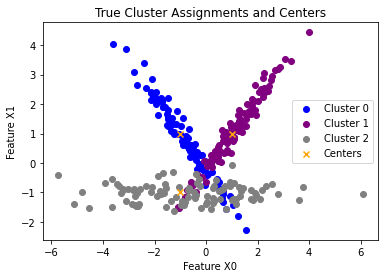

In [4]:
##generates and plots the ground truth data
true_mu = np.array( [ [ -1 , 1 ] , [ 1 , 1 ] , [ -1 , -1 ] ] )

true_covs = np.array( [ [ [ 1. , -1.2 ] , [ -1.2 , 1.5 ] ] , [ [ 1. , 1.2 ] , [ 1.2 , 1.5 ] ] , [ [ 5. , 0 ] , [ 0 , .1 ] ] ] ) 

num_points = [ 100 , 100 , 100 ]

X , true_r = generate_gmm_data( true_mu , true_covs , num_points )

plot_clustering_data( X , true_r , true_mu , 'True Cluster Assignments and Centers' )


## Q2: Did KMeans do a good job?  Why or why not.  

The plot below shows the data colored by the KMeans solution.  

Come up with 1 or 2 hypotheses about why the results look the way they do.

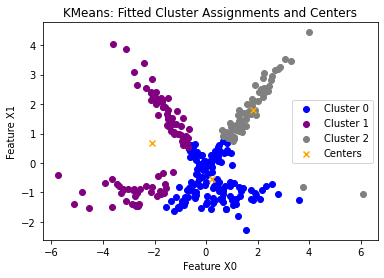

In [5]:
kmeans = KMeans( n_clusters=len( true_mu ) , init='random' , n_init=1 , random_state=random_state )
kmeans.fit( X )

fitted_mu = kmeans.cluster_centers_
fitted_r = kmeans.predict( X )

plot_clustering_data( X , fitted_r , fitted_mu , 'KMeans: Fitted Cluster Assignments and Centers' )
    

## Q3: Did the Gaussian Mixture Model do a good job?  Why or why not.  

The plot below shows the data colored by the GMM solution.  

Come up with 1 or 2 hypotheses about why the results look the way they do.

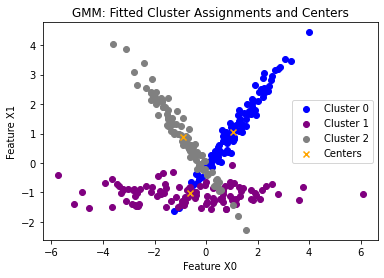

In [6]:
gmm = GaussianMixture( n_components=len( true_mu ) , random_state=random_state , init_params='kmeans'  )
gmm.fit( X )

fitted_mu = gmm.means_
fitted_r = gmm.predict( X )

plot_clustering_data( X , fitted_r , fitted_mu , 'GMM: Fitted Cluster Assignments and Centers' )

## Q4: Change the means/covariances/number of points per cluster so that both algorithms work.  Did this lend evidence towards or against your hypotheses about how both algorithms behaved on the initial dataset?

Change the parameters at the top of the script below and run it to see how both algorithms behave.

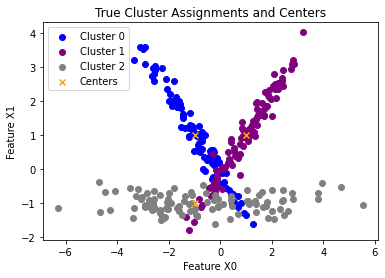

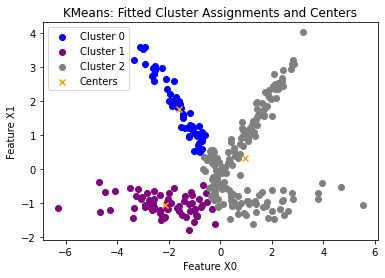

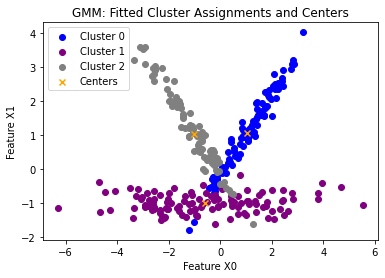

In [7]:
##Parameters to consider changing
true_mu = np.array( [ [ -1 , 1 ] , 
                     [ 1 , 1 ] , 
                     [ -1 , -1 ] ] )
true_covs = np.array( [ [ [ 1. , -1.2 ] , [ -1.2 , 1.5 ] ] , 
                       [ [ 1. , 1.2 ] , [ 1.2 , 1.5 ] ] , 
                       [ [ 5. , 0 ] , [ 0 , .1 ] ] ] ) 
num_points = [ 100 , 100 , 100 ]

##generates and plots the ground truth data
X , true_r = generate_gmm_data( true_mu , true_covs , num_points )
plot_clustering_data( X , true_r , true_mu , 'True Cluster Assignments and Centers' )

##Kmeans
kmeans = KMeans( n_clusters=len( true_mu ) , init='random' , n_init=1 , random_state=random_state )
kmeans.fit( X )
plot_clustering_data( X , kmeans.predict( X ) , kmeans.cluster_centers_ , 'KMeans: Fitted Cluster Assignments and Centers' )
    
##GMM
gmm = GaussianMixture( n_components=len( true_mu ) , random_state=random_state , init_params='kmeans' )
gmm.fit( X )
plot_clustering_data( X , gmm.predict( X ) , gmm.means_ , 'GMM: Fitted Cluster Assignments and Centers' )

